In [1]:
%pylab inline
import pandas as pd
from sklearn import model_selection
from sklearn import metrics, neighbors

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv("winequality-white.csv",sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

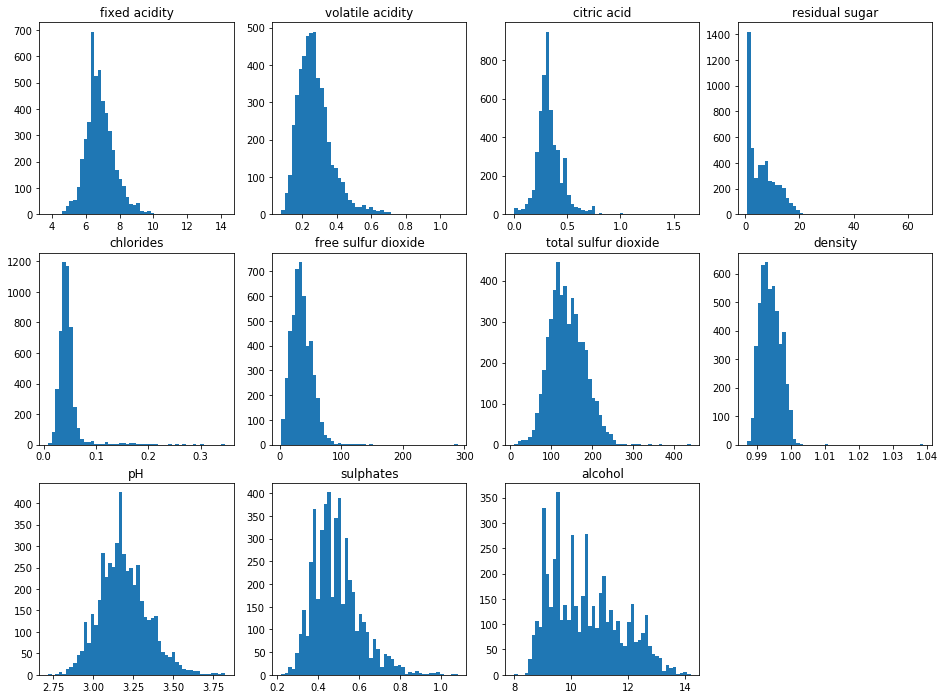

In [6]:
fig=plt.figure(figsize=(16,12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4,feat_idx+1)
    h = ax.hist(X.iloc[:,feat_idx],bins=50)
    ax.set_title(X.columns[feat_idx])

In [7]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
Xscaled=pd.DataFrame(scaler.fit_transform(X))
Xscaled.columns=X.columns

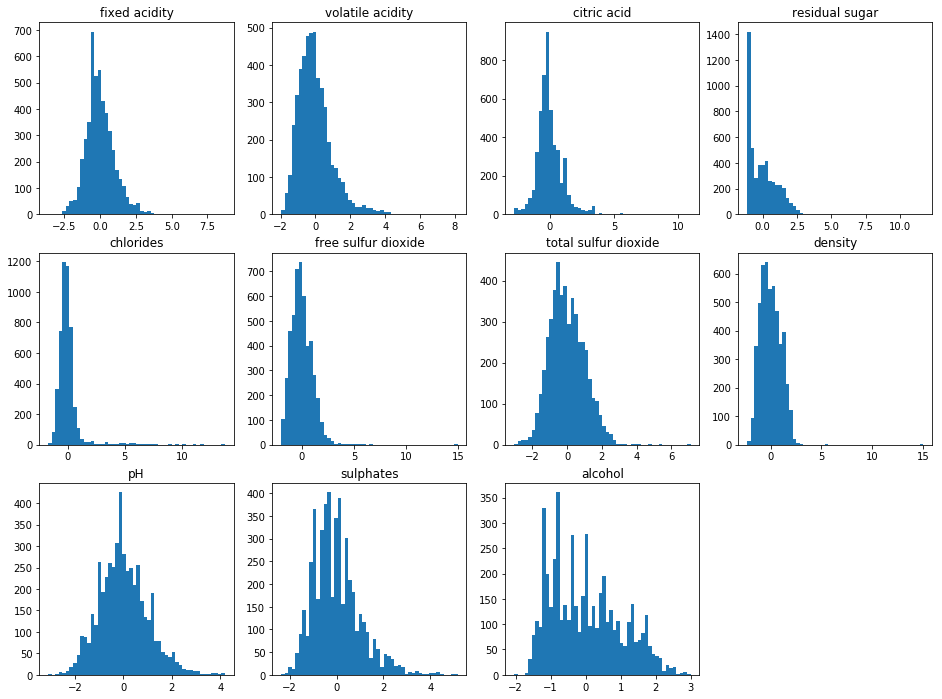

In [8]:
fig=plt.figure(figsize=(16,12))
for feat_idx in range(Xscaled.shape[1]):
    ax = fig.add_subplot(3,4,feat_idx+1)
    h = ax.hist(Xscaled.iloc[:,feat_idx],bins=50)
    ax.set_title(Xscaled.columns[feat_idx])

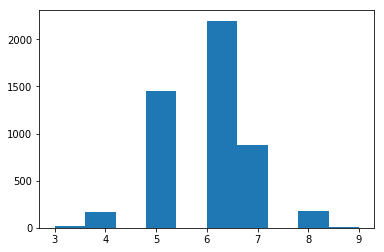

In [9]:
plot=plt.hist(y)

In [10]:
yclass=np.where(y>=6,1,0)

In [11]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(Xscaled,yclass)

In [12]:
clf=model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),{"n_neighbors":range(2,25)}, scoring="accuracy", cv=5,return_train_score=False)
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(2, 25)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='accuracy', verbose=0)

In [13]:
clf.best_params_

{'n_neighbors': 12}

In [14]:
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005605,0.002521,0.056992,0.023885,2,{'n_neighbors': 2},0.717391,0.719728,0.728883,0.719346,0.731608,0.723387,0.005717,23
1,0.006024,0.002405,0.068646,0.018668,3,{'n_neighbors': 3},0.759511,0.759184,0.761580,0.750681,0.771117,0.760414,0.006524,20
2,0.005938,0.002149,0.069544,0.011225,4,{'n_neighbors': 4},0.737772,0.756463,0.756131,0.741144,0.760218,0.750340,0.009069,22
3,0.005143,0.001896,0.061393,0.010622,5,{'n_neighbors': 5},0.736413,0.776871,0.769755,0.771117,0.771117,0.765042,0.014540,5
4,0.004419,0.001727,0.077169,0.009592,6,{'n_neighbors': 6},0.729620,0.774150,0.769755,0.771117,0.767030,0.762320,0.016529,17
5,0.003470,0.000752,0.061844,0.005973,7,{'n_neighbors': 7},0.735054,0.779592,0.765668,0.764305,0.777929,0.764498,0.015989,7
6,0.003688,0.000736,0.064397,0.006376,8,{'n_neighbors': 8},0.729620,0.776871,0.772480,0.761580,0.764305,0.760958,0.016623,19
7,0.005143,0.002374,0.068071,0.007826,9,{'n_neighbors': 9},0.751359,0.776871,0.768392,0.765668,0.768392,0.766131,0.008300,4
8,0.004004,0.002038,0.076834,0.017691,10,{'n_neighbors': 10},0.751359,0.772789,0.760218,0.764305,0.772480,0.764225,0.008042,8
9,0.005719,0.001222,0.081294,0.009768,11,{'n_neighbors': 11},0.739130,0.779592,0.757493,0.762943,0.776567,0.763136,0.014563,13


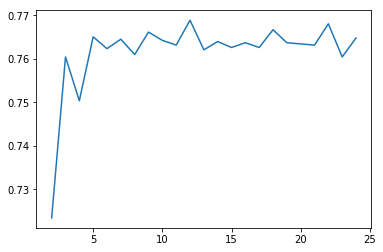

In [15]:
plot=plt.plot(res.param_n_neighbors,res.mean_test_score)

In [16]:
metrics.accuracy_score(ytest,clf.predict(Xtest))

0.7689795918367347

Text(0, 0.5, 'Sensibilite')

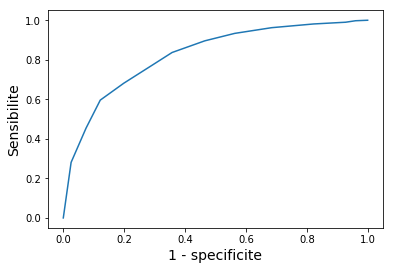

In [27]:
ytest_predict_proba = clf.predict_proba(Xtest)[:,1]
[fpr, tpr, thr] = metrics.roc_curve(ytest,ytest_predict_proba)
plt.plot(fpr,tpr)
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [28]:
metrics.roc_auc_score(ytest, ytest_predict_proba)

0.8238194631738176

In [35]:
idx = np.min(np.where(tpr > 0.95)) # indice du premier seuil pour lequel
                                   # la sensibilité est supérieure à 0.95
print("Sensibilité : %.2f" % tpr[idx])
print("Spécificité : %.2f" % (1-fpr[idx]))
print("Seuil : %.2f" % thr[idx])

Sensibilité : 0.96
Spécificité : 0.32
Seuil : 0.33
